In [107]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
import numpy as np

In [108]:
df = pd.read_csv("Resources/tsunami.csv")

### Filter for Last 100 Years
---

In [109]:
previous_100 = df[df['Year'] >= 1921]

In [110]:
previous_100.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged
1002,1921.0,5.0,14.0,11.0,17.0,45.0,2.0,1.0,6.2,0.0,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1003,1921.0,8.0,4.0,NaN,NaN,NaN,3.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1004,1921.0,9.0,11.0,4.0,1.0,38.0,4.0,1.0,7.5,0.0,...,-2.3,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,1921.0,11.0,11.0,18.0,36.0,8.0,3.0,1.0,7.5,0.0,...,0.5,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1006,1921.0,12.0,16.0,NaN,NaN,NaN,-1.0,9.0,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Columns 

In [111]:
columns_drop = ['Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsunami Magnitude (Iida)', 'Total Injuries']

previous_100.drop(columns_drop, axis =1 , inplace = True)

In [112]:
previous_100.isnull().sum().sort_values(ascending = False)

Total Missing                1151
Total Missing Description    1150
Total Houses Damaged         1091
Total Damage ($Mil)          1026
Total Houses Destroyed       1019
Total Deaths                  819
Tsunami Intensity             745
Total Damage Description      608
Maximum Water Height (m)      318
Earthquake Magnitude          260
Longitude                      64
Latitude                       64
Tsunami Event Validity          0
Number of Runups                0
Location Name                   0
Country                         0
Deposits                        0
Tsunami Cause Code              0
Year                            0
dtype: int64

In [113]:
too_many_nulls = ['Total Missing', 'Total Missing Description', 'Total Houses Damaged',
                 'Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Damage Description']

previous_100.drop(too_many_nulls, axis = 1, inplace = True)

***Drop all columns that have many non-nulls***

* Total Missing
* Total Missing Description
* Total Houses Damaged
* Total Damaged ($Mil)
* Total Damage Description - Can't analyze String, unless someone is a NPL (natural language processising) expert

### Must have coordinates 

In [114]:
previous_100 = previous_100[previous_100['Latitude'].notnull()]
previous_100

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths
1002,1921.0,2.0,1.0,6.2,0.0,INDONESIA,MAKASSAR STRAIT,0.700,117.900,1.00,1.0,0.5,NaN
1003,1921.0,3.0,1.0,NaN,0.0,CHINA,"XIAOSI, DANDONG, LIAONING",40.130,124.380,NaN,0.0,NaN,NaN
1004,1921.0,4.0,1.0,7.5,0.0,INDONESIA,JAVA,-11.000,111.000,0.10,3.0,-2.0,NaN
1005,1921.0,3.0,1.0,7.5,0.0,PHILIPPINES,PHILIPPINE TRENCH,8.000,127.000,NaN,4.0,1.0,NaN
1007,1922.0,2.0,1.0,7.2,0.0,PERU,S. PERU,-16.500,-73.000,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,2021.0,4.0,1.0,7.1,0.0,PHILIPPINES,"MINDANAO ISLAND, PHILIPPINES",6.455,126.742,0.05,2.0,NaN,1.0
2158,2021.0,4.0,1.0,8.1,0.0,UK TERRITORY,SOUTHERN ATLANTIC OCEAN,-58.416,-25.321,0.64,44.0,NaN,NaN
2159,2021.0,4.0,1.0,7.2,0.0,HAITI,PORT-AU-PRINCE,18.408,-73.475,NaN,3.0,NaN,2248.0
2160,2021.0,4.0,1.0,7.0,0.0,MEXICO,S. MEXICO,16.982,-99.773,0.48,1.0,NaN,3.0


### Replace Nulls with Column Mean 
---

If nulls is not significant, can replace with mean of non-nulls.

In [115]:
previous_100.isnull().sum().sort_values()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Number of Runups              0
Earthquake Magnitude        198
Maximum Water Height (m)    286
Tsunami Intensity           690
Total Deaths                763
dtype: int64

In [116]:
previous_100 = previous_100[previous_100['Earthquake Magnitude'].notnull()]
previous_100 = previous_100[previous_100['Maximum Water Height (m)'].notnull()]

## Key Columns 🔑🔑🔑

1) Water Height  
2) Tsunami Intensity vs. Magnitude (Intensity v. Magnitude Ratio)  
3) Total Deaths  
4) Earthquake Magnitude


Since the key columns we want also have the most nulls, we are likely forced to delete rows with nulls.

In [117]:
intensity = previous_100[previous_100['Tsunami Intensity'].notnull()]

In [118]:
intensity.isnull().sum()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Earthquake Magnitude          0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Maximum Water Height (m)      0
Number of Runups              0
Tsunami Intensity             0
Total Deaths                168
dtype: int64

### Mapping of Cause Code

In [119]:
dict_ = {"Tsunami Cause Code": [x for x in range(0,12)],
        "Natural Disaster": ['Unknown', 'Earthquake', 'Questionable Earthquake', 'Earthquake and Landslide',
                            'Volcano and Earthquake', 'Volcano, Earthquake, and Landslaide', 'Volcano',
                            'Volcano and Landslide', 'Landslide', 'Meterological', 'Explosion', 'Astronomical Tide']}

code = pd.DataFrame(dict_)

intensity = pd.merge(intensity, code, on = 'Tsunami Cause Code')

intensity.head()

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Natural Disaster
0,1921.0,2.0,1.0,6.2,0.0,INDONESIA,MAKASSAR STRAIT,0.700,117.900,1.0,1.0,0.5,NaN,Earthquake
1,1921.0,4.0,1.0,7.5,0.0,INDONESIA,JAVA,-11.000,111.000,0.1,3.0,-2.0,NaN,Earthquake
2,1922.0,2.0,1.0,6.3,0.0,PHILIPPINES,CEBU ISLAND,10.200,124.100,0.7,3.0,0.0,5.0,Earthquake
3,1922.0,4.0,1.0,8.7,0.0,CHILE,NORTHERN CHILE,-28.553,-70.755,9.0,36.0,2.5,700.0,Earthquake
4,1922.0,3.0,1.0,6.3,0.0,NEW ZEALAND,SE. NEW ZEALAND,-43.000,173.000,0.4,3.0,0.0,NaN,Earthquake


In [120]:
intensity['location'] = intensity[['Latitude', 'Longitude']].values.tolist()

In [121]:
intensity.to_csv("./Cleaned_Data_intensity.csv", index = False)

In [122]:
deaths_df = intensity[intensity['Total Deaths'].notnull()]
deaths_df.to_csv("./Cleaned_Data_deaths.csv", index = False)
deaths_df

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Natural Disaster,location
2,1922.0,2.0,1.0,6.3,0.0,PHILIPPINES,CEBU ISLAND,10.200,124.100,0.7,3.0,0.0,5.0,Earthquake,"[10.2, 124.1]"
3,1922.0,4.0,1.0,8.7,0.0,CHILE,NORTHERN CHILE,-28.553,-70.755,9.0,36.0,2.5,700.0,Earthquake,"[-28.553, -70.755]"
5,1923.0,4.0,1.0,7.2,1.0,RUSSIA,KAMCHATKA,56.500,162.500,20.0,11.0,3.5,18.0,Earthquake,"[56.5, 162.5]"
7,1923.0,4.0,1.0,7.9,1.0,JAPAN,SAGAMI BAY,35.100,139.500,13.0,140.0,3.0,142807.0,Earthquake,"[35.1, 139.5]"
12,1927.0,4.0,1.0,6.8,0.0,UKRAINE,"CRIMEA, BLACK SEA",44.400,34.500,1.0,1.0,2.0,11.0,Earthquake,"[44.4, 34.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1992.0,4.0,3.0,7.8,9.0,INDONESIA,FLORES SEA,-8.480,121.896,26.2,111.0,2.7,2500.0,Earthquake and Landslide,"[-8.48, 121.896]"
280,1995.0,4.0,3.0,6.9,0.0,INDONESIA,TIMOR SEA,-8.452,125.049,4.0,2.0,1.5,11.0,Earthquake and Landslide,"[-8.452, 125.049]"
281,1995.0,4.0,3.0,6.5,1.0,GREECE,GULF OF CORINTH: AIYION,38.401,22.283,1.0,2.0,3.0,26.0,Earthquake and Landslide,"[38.401, 22.283]"
283,1933.0,4.0,6.0,6.0,1.0,RUSSIA,"KHARIMKOTAN, N. KURIL ISLANDS",49.120,154.508,9.0,2.0,2.0,2.0,Volcano,"[49.12, 154.508]"


## Distribution of Year
---

Looks like despite focusing on Intensity the year is more or less well distributed.. good nuff

(array([23., 20., 28., 26., 31., 46., 43., 13., 19., 36.]),
 array([1921. , 1929.2, 1937.4, 1945.6, 1953.8, 1962. , 1970.2, 1978.4,
        1986.6, 1994.8, 2003. ]),
 <BarContainer object of 10 artists>)

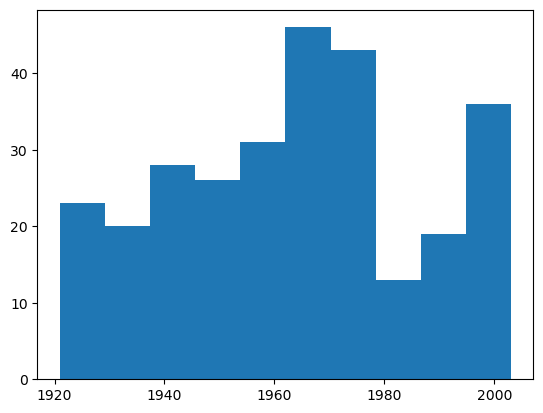

In [123]:
import matplotlib.pyplot as plt

plt.hist(intensity['Year'])

In [124]:
#Additional Metrics 

#Water Height 

mean_waterheight = np.mean(intensity['Maximum Water Height (m)'])
print(mean_waterheight)
sd_waterheight = intensity['Maximum Water Height (m)'].std()
print(sd_waterheight)

#Max water height of 524.6m in our dataset occured in 1958 in SE. Alaska, AK due to an Earthwuake Mag of 7.8. 
max_waterheight = (intensity['Maximum Water Height (m)']).max()
print(max_waterheight)
max_waterheight_location = intensity.loc[intensity["Maximum Water Height (m)"] >=524.6] 
print(max_waterheight_location)

#Min water height of 0.03M in our dataset occured in 1921 in Indoensia Makassar, Strait with an earthquake mag of 6.2.  
min_waterheight = (intensity['Maximum Water Height (m)']).min()
print(min_waterheight)
min_waterheight_location = intensity.loc[intensity["Maximum Water Height (m)"] >=0.03] 
print(min_waterheight_location.head(1))

5.336421052631577
31.571729897098294
524.6
       Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
272  1958.0                     4.0                 3.0                   7.8   

     Deposits Country   Location Name  Latitude  Longitude  \
272       2.0     USA  SE. ALASKA, AK     58.37   -136.665   

     Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
272                     524.6              17.0                5.0   

     Total Deaths          Natural Disaster           location  
272           5.0  Earthquake and Landslide  [58.37, -136.665]  
0.03
     Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
0  1921.0                     2.0                 1.0                   6.2   

   Deposits    Country    Location Name  Latitude  Longitude  \
0       0.0  INDONESIA  MAKASSAR STRAIT       0.7      117.9   

   Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
0                       1.0          

In [125]:
#Tsunami Intensity 

mean_tsunamiintensity = np.mean(intensity['Tsunami Intensity'])
print(mean_tsunamiintensity)
sd_tsunamiintensity = intensity['Tsunami Intensity'].std()
print(sd_tsunamiintensity)

#Tsunami with largest intensity of 5.0 occured in 1956 in Greece, Cyclades due to an earthquake mag of 7.7. 
max_tsunamiintensity = (intensity['Tsunami Intensity']).max()
print(max_tsunamiintensity)
max_tsunamiintensity_location = intensity.loc[intensity["Tsunami Intensity"] >=5] 
print(max_tsunamiintensity_location.head(1))

#Tsunami with smallest intensity of -4.14 occured in 2002 in VANUATU ISLANDS due to an earthquake mag of 7.2. 
min_tsunamiintensity = (intensity['Tsunami Intensity']).min()
print(min_tsunamiintensity)
min_tsunamiintensity_location = intensity.loc[intensity["Tsunami Intensity"] <=-4.14] 
print(min_tsunamiintensity_location.head(1))

0.1377543859649123
2.0586815167355668
5.0
      Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
86  1956.0                     4.0                 1.0                   7.7   

    Deposits Country Location Name  Latitude  Longitude  \
86       3.0  GREECE      CYCLADES    36.664     25.957   

    Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
86                      30.0             100.0                5.0   

    Total Deaths Natural Disaster          location  
86          56.0       Earthquake  [36.664, 25.957]  
-4.14
       Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
256  2002.0                     4.0                 1.0                   7.2   

     Deposits  Country    Location Name  Latitude  Longitude  \
256       0.0  VANUATU  VANUATU ISLANDS     -17.6    167.856   

     Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
256                       3.0               2.0              -4

In [126]:
#Total Deaths 

mean_d = np.mean(deaths_df['Total Deaths'])
print(mean_d)
sd_d = deaths_df['Total Deaths'].std()
print(sd_d)

#Japan Sagami Bay had the largest amount of deaths in a Tsunami in 1923 due to an Earthquake Magnitude of 7.9. 
max_d = (intensity['Total Deaths']).max()
print(max_d)
max_death = deaths_df.loc[deaths_df["Total Deaths"] >=142806] 
print(max_death.head(1))

#Northern Chile had the smallest amount of deaths due to a Tsunami in our dataset in 1936. 
min_d = (deaths_df['Total Deaths']).min()
print(min_d)
min_death = deaths_df.loc[deaths_df["Total Deaths"] <=1] 
print(min_death.head(1))

1973.7863247863247
13543.040478815887
142807.0
     Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
7  1923.0                     4.0                 1.0                   7.9   

   Deposits Country Location Name  Latitude  Longitude  \
7       1.0   JAPAN    SAGAMI BAY      35.1      139.5   

   Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
7                      13.0             140.0                3.0   

   Total Deaths Natural Disaster       location  
7      142807.0       Earthquake  [35.1, 139.5]  
1.0
      Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
34  1936.0                     4.0                 1.0                   7.3   

    Deposits Country   Location Name  Latitude  Longitude  \
34       0.0   CHILE  NORTHERN CHILE     -24.5      -70.0   

    Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
34                       1.0               3.0                0.5   

    Total Dea

In [127]:
#Earthquake Magnitude 

mean_earthmag = np.mean(intensity['Earthquake Magnitude'])
print(mean_earthmag)
sd_earthmag = intensity['Earthquake Magnitude'].std()
print(sd_earthmag)

#Max earthquake magnitude of 9.5 occured in Southern Chile in 1960. 
max_earthmag = (intensity['Earthquake Magnitude']).max()
print(max_earthmag)
max_earthmag_location = intensity.loc[intensity["Earthquake Magnitude"] >=9.5] 
print(max_earthmag_location.head(1))

#Min earthquake mag of 4.4. occured in Cadiz, Spain in 1978. 
min_earthmag = (intensity['Earthquake Magnitude']).min()
print(min_earthmag)
min_earthmag_location = intensity.loc[intensity["Earthquake Magnitude"] <=4.4] 
print(min_earthmag_location.head(1))

7.176842105263161
0.7456143083474553
9.5
       Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
102  1960.0                     4.0                 1.0                   9.5   

     Deposits Country   Location Name  Latitude  Longitude  \
102      26.0   CHILE  SOUTHERN CHILE   -38.143    -73.407   

     Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
102                      25.0            1277.0                4.0   

     Total Deaths Natural Disaster            location  
102        2226.0       Earthquake  [-38.143, -73.407]  
4.4
       Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
197  1978.0                     4.0                 1.0                   4.4   

     Deposits Country Location Name  Latitude  Longitude  \
197       0.0   SPAIN         CADIZ     36.37      -6.98   

     Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
197                      0.12               1.0           

In [128]:
#Run-Ups 
mean_runup = np.mean(intensity['Number of Runups'])
print(mean_runup)
sd_runup = intensity['Number of Runups'].std()
print(sd_runup)

#Max Run-up of 1277 occured in Southern Chile in 1960 with an earthquake mag of 9.5.  
max_runup = (intensity['Number of Runups']).max()
print(max_runup)
max_runup_location = intensity.loc[intensity["Number of Runups"] >=1277] 
print(max_runup_location.head(1))

#Min runup was 0. 
min_runup = (intensity['Number of Runups']).min()
print(min_runup)

30.20701754385965
99.82337898926389
1277.0
       Year  Tsunami Event Validity  Tsunami Cause Code  Earthquake Magnitude  \
102  1960.0                     4.0                 1.0                   9.5   

     Deposits Country   Location Name  Latitude  Longitude  \
102      26.0   CHILE  SOUTHERN CHILE   -38.143    -73.407   

     Maximum Water Height (m)  Number of Runups  Tsunami Intensity  \
102                      25.0            1277.0                4.0   

     Total Deaths Natural Disaster            location  
102        2226.0       Earthquake  [-38.143, -73.407]  
0.0


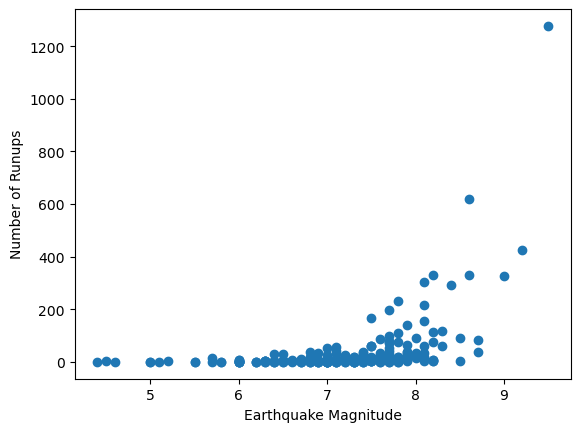

PearsonRResult(statistic=0.4281742165738778, pvalue=3.9071140468074216e-14)


In [138]:
#Correlation between earthquake mag & number of run ups
plt.scatter(intensity.iloc[:,3],intensity.iloc[:,10])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Number of Runups')
plt.show()

Earthmag = intensity.iloc[:,3]
Runups = intensity.iloc[:,10]
correlation = st.pearsonr(Earthmag,Runups)
print(correlation)

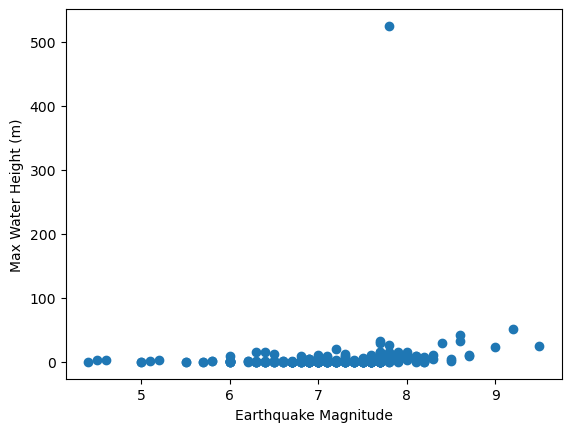

PearsonRResult(statistic=0.13661290309442237, pvalue=0.02105584173444975)


In [139]:
#Earthquake Magnitude Correlation with Maximum Water height 
plt.scatter(intensity.iloc[:,3],intensity.iloc[:,9])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Max Water Height (m)')
plt.show()

maxwh = intensity.iloc[:,9]
correlation_2 = st.pearsonr(Earthmag,maxwh)
print(correlation_2)

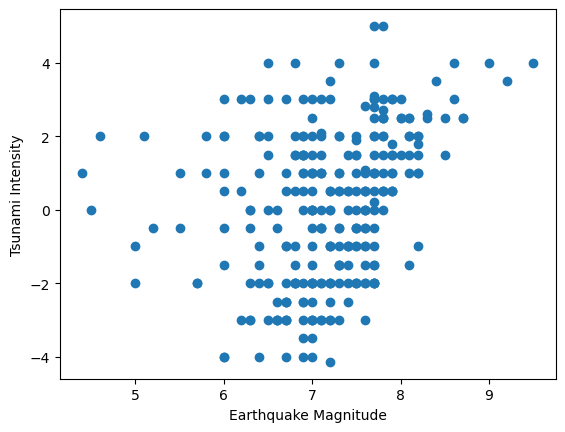

PearsonRResult(statistic=0.317063733977598, pvalue=4.476777063006922e-08)


In [140]:
#Earthquake Magnitude Correlation with Tsunami Intensity  
plt.scatter(intensity.iloc[:,3],intensity.iloc[:,11])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Tsunami Intensity')
plt.show()

tsunamiintensity = intensity.iloc[:,11]
correlation_3 = st.pearsonr(Earthmag,tsunamiintensity)
print(correlation_3)

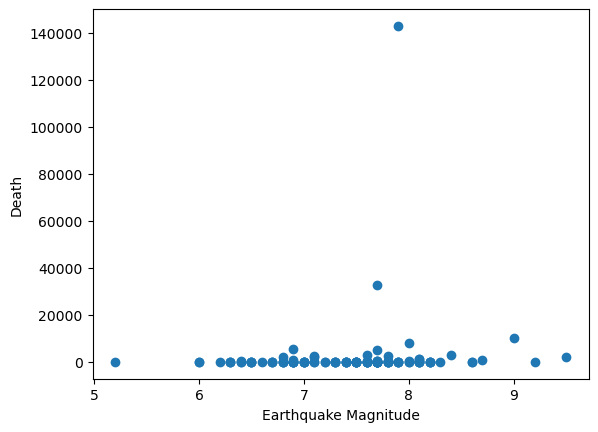

In [146]:
#Earthquake Magnitude Scatterplot with Total Deaths  
plt.scatter(deaths_df.iloc[:,3],deaths_df.iloc[:,12])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Death')
plt.show()

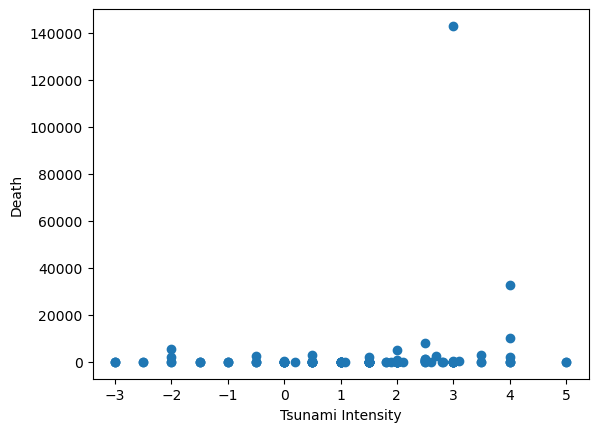

In [147]:
#Tsunami Intensity Scatterplot with Total Deaths  
plt.scatter(deaths_df.iloc[:,11],deaths_df.iloc[:,12])
plt.xlabel('Tsunami Intensity')
plt.ylabel('Death')
plt.show()

In [170]:
#31 Countries that had Tsunamis 

intensity['Country'].value_counts()


JAPAN               77
RUSSIA              43
USA                 21
INDONESIA           20
CHILE               14
GREECE              13
MEXICO              13
PERU                12
SOLOMON ISLANDS     12
PAPUA NEW GUINEA    11
PHILIPPINES          7
NEW ZEALAND          5
TAIWAN               4
VANUATU              4
COSTA RICA           4
SAMOA                3
UKRAINE              2
ALGERIA              2
TONGA                2
COLOMBIA             2
TURKEY               2
PORTUGAL             2
CANADA               2
GUATEMALA            1
ATLANTIC OCEAN       1
ITALY                1
SPAIN                1
MONTENEGRO           1
NICARAGUA            1
NEW CALEDONIA        1
FIJI                 1
Name: Country, dtype: int64